# Import Library

In [1]:
# Data Loading
import xarray as xr  

# Data Processing
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Data Load

In [2]:
path = './precip.mon.ltm.nc'

ncfile = xr.open_dataset(path)
print(ncfile) # print dataset infomation 

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * lat                 (lat) float32 88.75 86.25 83.75 ... -83.75 -86.25 -88.75
  * lon                 (lon) float32 1.25 3.75 6.25 ... 353.75 356.25 358.75
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    COARDS
    title:                          CPC Merged Analysis of Precipitation (exc...
    platform:                       Analyses
    source:                         ftp ftp.cpc.ncep.noaa.gov precip/cmap/mon...
    dataset_title:                  CPC Merged Analysis of Precipitation
    documentation:                  https://www.esrl.noaa.gov/psd/data/gridde...
    date_modified:              

/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/xarray/coding/times.py:459: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/python/2.7/envs/p3.6_cpu/lib/python3.6/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


# Data Processing

In [3]:
# select variable
precip = ncfile.data_vars['precip']
print(precip.shape)  # [time, lat, lon]

(12, 72, 144)


In [4]:
# check null values
np.sum(np.isnan(precip))

<xarray.DataArray 'precip' ()>
array(5905)

In [5]:
# set spatial domain
# The method parameter is not yet supported if any of the arguments to .sel() is a slice object
precip_wusa = precip.sel(lon=237.5, method='nearest') 
precip_wusa = precip_wusa.sel(lat=slice(60,25)) # you don't need to use method to do inexact slicing.

print(precip_wusa.shape)

(12, 14)


In [6]:
# switch y-t axis
precip_wusa = precip_wusa.transpose('lat','time')
print(precip_wusa.shape)

(14, 12)


# Visualizatoin

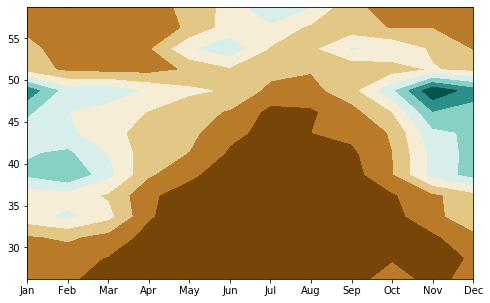

In [7]:
# # of figure and size
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

# There are many other techniques to set xaxis, but here let's take a simple way
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.contourf(month, precip_wusa.lat, precip_wusa,
           cmap=plt.cm.BrBG # matplolib provides lots of colormaps. (https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
           )

plt.show()